<a href="https://colab.research.google.com/github/anferivera/Programming/blob/main/2_3_errors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Errors**:

[See book: Métodos numéricos
usando Python ](https://librosoa.unam.mx/bitstream/handle/123456789/3416/MNPython.pdf?sequence=1&isAllowed=y) pag. 32

The binary numbers not always can be stored in a finite way.
The amount of digits storage depend if we use **16, 32, 64 bits**.

To eliminated numbers genrate an error (error de redondeo).

*   **def. Error:** It is the diference between the obtained value an the correct value.

\begin{align}
E =& \text{valor} - \text{real}\\
E_\text{absoluto} =& |\text{valor} - \text{real}|\\
E_\text{realtivo} =& \dfrac{|\text{valor} - \text{real}|}{\text{real}}\\
E_\text{realtivo porcentual} =&\dfrac{|\text{valor} - \text{real}|}{\text{real}}\times 100
\end{align}

*   **def: Round error (error de redondeo)**: Those are generated when we eliminated digists of a quantity. Do not confused whith the round technique, which it is used to write a quantity with some digits. For example: $round(1,23452,2)=1,23$
*   **def: Truncation error (error de truncamiento):** Those are generated when we eliminated terms of an expression. For example, in the Taylor serie expansion with a finite numbers of terms.

In numerical methods it is inevitable to fall in this kind of errors. The goal is to reduce them in our computations.



**Erorr example 1**: In an experiment you measure $x=1.01$ and the exact value is $x=1$.

In [ ]:
valor = 10.1
valor_real =10.

print('E=', round(valor- valor_real ,3) )
print('E_absoluto=', round(abs( valor- valor_real ) ,3) )
print('E_relativo=', round(abs( valor- valor_real )/valor_real ,3) )
print('E_relativo porcentual=', round(abs( valor- valor_real )/valor_real*100 ,3) )

E= 0.1
E_absoluto= 0.1
E_relativo= 0.01
E_relativo porcentual= 1.0


# Round error

Example.

In [ ]:
number = 1.23552
print('number ->', number, '\n')

#Cut the number with two decimal digits.
print('cut x ->',int(number*100)/100)

#Round the number to two decimal digits.
print('round x ->',round(number,2))

number -> 1.23552 

cut x -> 1.23
round x -> 1.24


# Truncation error

**Taylor Serie** (It is a MacLaurin serie when $x_0=0$).

\begin{equation}
f(x) = f(x_0) + f'(x_0)(x-x_0)+ \dfrac{f''(x_0)}{2!}(x-x_0)^2 + \cdots = \sum_{i=0}^{\infty} \dfrac{f^i(x_0)}{i!}(x-x_0)^i
\end{equation}

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

**Example 1:** Taylor serie for $\cos(x)$ truncated to order 8.

We know that:
\begin{equation}
\sin(x)=\lim_{N->\infty}\sum_{n=0}^N \dfrac{(-1)^n x^{2n+1}}{(2n+1)!}=\lim_{N->\infty} \left( x - \dfrac{x^3}{3!}+ \dfrac{x^5}{5!} ...\right)
\end{equation}
\begin{equation}
\cos(x)=\lim_{N->\infty}\sum_{n=0}^N \dfrac{(-1)^n x^{2n}}{(2n)!}=\lim_{N->\infty} \left(1-\dfrac{x^2}{2!}+ \dfrac{x^4}{4!} ...\right)
\end{equation}

However, the serie can be obtained using the library sympy of python

In [2]:
x = sp.Symbol('x')

x**8/40320 - x**6/720 + x**4/24 - x**2/2 + 1


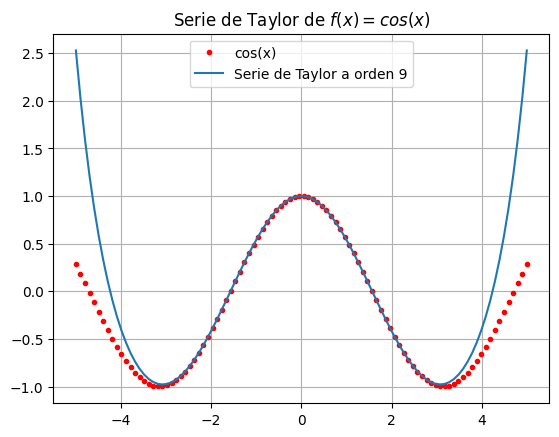

In [18]:
x0 =0
n =9

x = sp.Symbol('x')
t = sp.cos(x).series(x , x0 , n ).removeO()
print( t )
#Convert a SymPy expression into a function that allows for fast numeric evaluation.
t = sp.lambdify(x ,t)

xx = np.linspace( x0 -5 , x0 +5 ,100)
yc = np.cos(xx)
yt = t(xx)

plt.plot( xx , yc,'r.')#
plt.plot( xx , yt )
plt.legend([ 'cos(x)','Serie de Taylor a orden 9'])
plt.title('Serie de Taylor de $f(x)=cos(x)$')
plt.grid( True )

The beahavior around $x_0=0$ is good and in general for all the dominio. Hwever, here the periodicity of the funtion is no seen.

**Example 2:** Taylor serie for $\ln(x)$ truncated to order 5.

x - (x - 1)**4/4 + (x - 1)**3/3 - (x - 1)**2/2 - 1


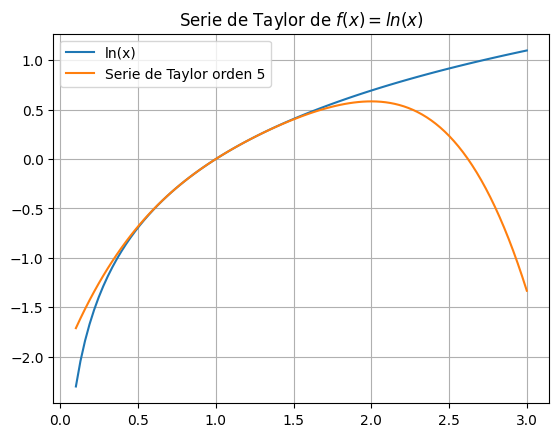

In [23]:
x0 =1
n = 5

x = sp.Symbol('x')
t = sp.log(x).series(x , x0 , n ).removeO()
print( t )
#Convert a SymPy expression into a function that allows for fast numeric evaluation.
t = sp.lambdify(x ,t)

xx = np.linspace( x0-0.9 , x0+2 ,100)
yc = np.log(xx)
yt = t(xx)

plt.plot ( xx , yc , xx , yt )
plt.legend ([ 'ln(x)','Serie de Taylor orden 5'])
plt.title ('Serie de Taylor de $f(x)=ln(x)$')
plt.grid ( True )

We realice that the serie to order 5 match very well the funtion onli near to $x_0=1$.

**Example 3:** Taylor serie for $\exp(i\,x)=\cos(x)+i\sin(x)$ truncated to order 8. It is good to practice with the Imaginary numbers.

-0.000198412698412698*I*x**7 - 0.00138888888888889*x**6 + 0.00833333333333333*I*x**5 + 0.0416666666666667*x**4 - 0.166666666666667*I*x**3 - 0.5*x**2 + 1.0*I*x + 1


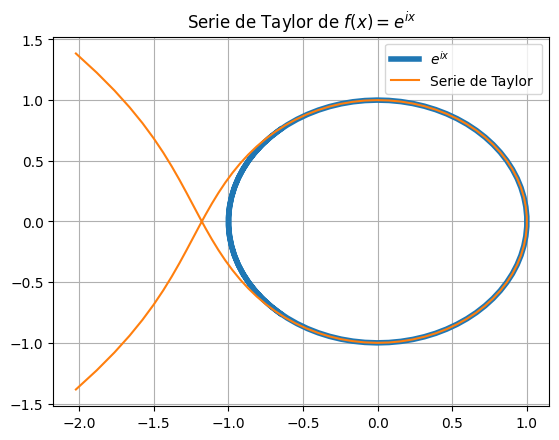

In [21]:
x0 =0
n =8

x = sp.Symbol ('x')
t = sp.series( sp.exp(1j*x ) ,x , x0 , n ).removeO()
print (t)
t = sp.lambdify(x ,t )

yt = t( np . pi )

#print( yt )
xx = np.linspace ( x0 -4 , x0 +4 ,100)
yc = np.exp (1j * xx )
yt = t( xx )

plt.plot( yc.real , yc.imag, lw=4 )
plt.plot(yt.real , yt.imag )

plt.legend([ '$e ^{ ix}$','Serie de Taylor '])
plt.title('Serie de Taylor de $f(x)=e^{ ix}$')
plt.grid( True )

sustracción cancelativa?

# Tarea 2.3: Error de truncamiento

* Escoja una función, hacerle la expansión de Taylor alrededor de un punto $x_0$ hasta un orden N.

* Dibujar la expasión para varios ordenes $N$ en conjunto con la función según numpy.
* ¿Qué puede decir respecto al error de truncamiento?
